<a href="https://colab.research.google.com/github/b-siddharth/_ML/blob/main/thompson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Dataset

In [3]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

Building the Thompson Sampling Model

In [4]:
import random 
N = len(data)
d = 10
ads_selected = []
number_rewards_1 = [0] * d
number_rewards_0 = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0 
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(number_rewards_1[i] + 1, number_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = data.values[n, ad]
  if reward == 1:
    number_rewards_1[ad] = number_rewards_1[ad] + 1
  else:
    number_rewards_0[ad] = number_rewards_0[ad] + 1
  total_reward = total_reward + reward

Visualization of the results 

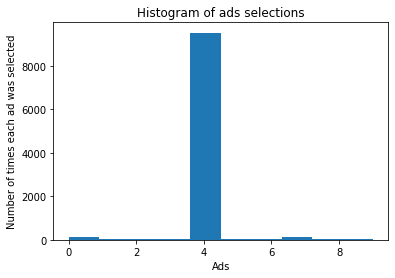

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()